<a href="https://colab.research.google.com/github/Alekhyo/Statistics/blob/master/stats_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Question 1.

You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

In [0]:
def percentile(arr,n):
       pos=((n/100)*len(arr))
       if (pos).is_integer()==True:
         pos=int(pos)
         return((arr[pos-1]+arr[pos])/2)
       else:
         pos=math.ceil(pos)
         return(arr[pos-1])

def interqr(arr):
    arr=np.sort(arr,axis=None)
    return percentile(arr,75)-percentile(arr,25)

In [0]:
a=np.array([23,14,13,56,78,98,12])
print("The interquartile range is {}".format(interqr(a)))

The interquartile range is 65


# Question 2:

Plot a histogram for total team scores for all IPL games

In [0]:
delivery=pd.read_csv('deliveries.csv')

In [0]:
a=delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index()

In [0]:
a=a['total_runs'].values

(array([ 15.,   3.,  20.,  66., 198., 414., 378., 160.,  26.,   4.]),
 array([  2. ,  28.1,  54.2,  80.3, 106.4, 132.5, 158.6, 184.7, 210.8,
        236.9, 263. ]),
 <a list of 10 Patch objects>)

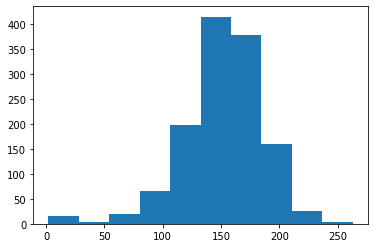

In [0]:
plt.hist(a)

# Question 3.

Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

In [0]:
a=delivery
a=a[(a['wide_runs']==0) & (a['noball_runs']==0)]
a=a.groupby(['bowler'])['match_id'].count().reset_index()
a.rename(columns={'match_id':'balls bowled'},inplace=True) 
a=a[a['balls bowled']>300]         #Bowler with more than 300 balls bowled

names=list(a['bowler'])

b=delivery[delivery['bowler'].isin(names)]
b=b.groupby(['bowler'])['batsman_runs'].sum().reset_index()   #Runs scored against these bowlers

a=a.merge(b,left_on='bowler',right_on='bowler')

a['Economy']=(a['batsman_runs']/a['balls bowled'])*6

a

,bowler,balls bowled,batsman_runs,Economy
0,A Kumble,965,1027,6.385492
1,A Mishra,2639,3191,7.255021
2,A Nehra,1908,2422,7.616352
3,A Singh,473,603,7.649049
4,A Symonds,527,656,7.468691
...,...,...,...,...
118,WD Parnell,572,651,6.828671
119,YK Pathan,1129,1350,7.174491
120,YS Chahal,1191,1532,7.717884
121,Yuvraj Singh,857,1042,7.295216


(array([ 6.,  5., 14., 16., 25., 18., 12., 12.,  9.,  6.]),
 array([6.21128949, 6.48849387, 6.76569826, 7.04290264, 7.32010703,
        7.59731141, 7.87451579, 8.15172018, 8.42892456, 8.70612895,
        8.98333333]),
 <a list of 10 Patch objects>)

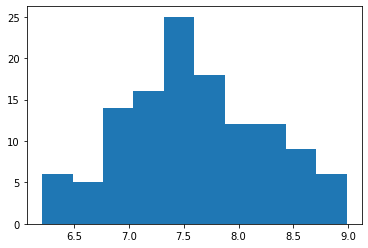

In [0]:
plt.hist(a['Economy'])

# Question 4:

Give three examples of negatively skewed data and 3 examples of positively skewed data

In [0]:
Positive Skewed Data:
    1. Sales of Newspaper throughout the day
    2. Income of a country
    3. Price of an unsold product

Negative Skewed Data:
    1. sales of liquor throughtout the day
    2. no of corona virus infected patients
    3. no. of data science job roles this decade